# Unified Time-Lapse ERT Workflow with Climate Integration

This notebook demonstrates **automatic time-lapse workflow detection** using `BaseAgent.run_unified_agent_workflow()`.

## Time-Lapse ERT Workflow

Monitor temporal changes in subsurface resistivity to track:
- **Moisture infiltration** and drainage
- **Seasonal variations** in water content
- **Hydrological processes** over time

## How It Works

```python
# 1. Describe your time-lapse workflow with multiple files
user_request = "Run time-lapse ERT on 4 files: baseline.ohm, time2.ohm..."

# 2. System automatically detects TIME-LAPSE workflow
config = context_agent.parse_request(user_request)
results, plan, interpretation, files = BaseAgent.run_unified_agent_workflow(
    config, api_key, llm_model, llm_provider, output_dir
)

# 3. Get temporal resistivity changes + climate integration
```

## Key Features

✅ **Auto-Detection**: Detects time-lapse mode from multiple file references  
✅ **Temporal Regularization**: Smooths changes between time steps  
✅ **Climate Integration**: Correlates with precipitation, temperature, PET  
✅ **Conda Environment**: Uses isolated environment for climate data fetching  

---

## 1. Setup and Imports

Run the cells below to see automatic time-lapse detection in action!


In [1]:
import os
import sys
from pathlib import Path

# Import core agents - BaseAgent has the unified workflow logic built-in!
from PyHydroGeophysX.agents import (
    BaseAgent,
    ContextInputAgent
)

# Setup default output directory for time-lapse workflows
default_output_dir = Path('results/unified_workflow_timelapse')
default_output_dir.mkdir(parents=True, exist_ok=True)

print("✓ All packages imported successfully")
print("✓ Using BaseAgent.run_unified_agent_workflow() for auto-detection")
print("✓ Workflow type will be automatically detected from your request!")
print(f"✓ Output directory: {default_output_dir}")


API path =  c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\resipy
ResIPy version =  3.6.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.
✓ All packages imported successfully
✓ Using BaseAgent.run_unified_agent_workflow() for auto-detection
✓ Workflow type will be automatically detected from your request!
✓ Output directory: results\unified_workflow_timelapse


## 2. Configure API Key

Set your OpenAI API key here:


In [ ]:
# Set API key directly (or it will try to get from environment)


# Configure API
llm_provider = 'openai'  # Options: 'openai', 'gemini', 'claude'
llm_model = 'gpt-4o-mini'
api_key = os.getenv('OPENAI_API_KEY')

if not api_key:
    print("⚠️  Warning: API key not found")
else:
    print(f"✓ Using {llm_provider} with model {llm_model}")

# Initialize context agent for natural language parsing
context_agent = ContextInputAgent(api_key=api_key, model=llm_model, llm_provider=llm_provider)

print("✓ System ready - using BaseAgent.run_unified_agent_workflow()")
print("✓ Workflow type will be automatically detected from your request!")


✓ Using openai with model gpt-4o-mini
✓ System ready - using BaseAgent.run_unified_agent_workflow()
✓ Workflow type will be automatically detected from your request!


## 3. Time-Lapse ERT Workflow Example

The system automatically detects **TIME-LAPSE** mode when you provide:
- Multiple ERT data files (4 timesteps in this example)
- Time-lapse inversion settings (temporal regularization, difference method)
- Climate data configuration (coordinates, date range, variables)

This example uses:
- **4 E4D format files** from Mt. Snodgrass, Colorado (March-June 2022)
- **Climate integration** via separate conda environment
- **Temporal regularization** (λ_t=10) for smooth changes between timesteps


TWO-STAGE NATURAL LANGUAGE EXTRACTION

📝 Request Part 1: ERT Inversion Configuration
   - Data files and instrument settings
   - Inversion mode and parameters
   - Regularization and solver options

🌤️  Request Part 2: Climate/Site Configuration
   - Site coordinates and location
   - Date range for climate data
   - Meteorological variables

COMBINED USER REQUEST:

I need to run a TIME-LAPSE ERT inversion to monitor moisture infiltration.

DATA FILES FOR TIME-LAPSE INVERSION:
Please use these 4 E4D format data files located in folder data/ERT/E4D:

File 1 (BASELINE): 2022-03-26_0030.ohm
File 2: 2022-04-26_0030.ohm
File 3: 2022-05-26_0030.ohm
File 4: 2022-06-26_0030.ohm

INVERSION SETTINGS:
- Inversion Type: TIME-LAPSE (difference method)
- Instrument Type: E4D
- Data Directory: data/ERT/E4D
- Baseline File: First file (2022-03-26_0030.ohm)
- Temporal Regularization Parameter: 10
- Spatial Regularization (lambda): 15
- Maximum Iterations: 10



SITE INFORMATION:
- Site Name: Mt. Snodg

13/11/25 - 11:03:31 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (6.9s x 21): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\1940901231700246622


  ✓ Climate data fetched: mt._snodgrass_monitoring_site_climate.csv
[INFO] ClimateDataAgent: Starting climate data retrieval
[INFO] ClimateDataAgent: Loading pre-fetched climate data from CSV: data\climate\mt._snodgrass_monitoring_site_climate.csv
[INFO] ClimateDataAgent: Loaded 16425 records from CSV
[INFO] ClimateDataAgent: Standardized 6 column names
[INFO] ClimateDataAgent: Loaded metadata from: data\climate\mt._snodgrass_monitoring_site_climate.json
[INFO] ClimateDataAgent: Aligning climate data with ERT timestamps
[INFO] ClimateDataAgent: Climate data loaded from CSV successfully
  ✓ Climate data loaded from CSV

Running time-lapse inversion...
[ert_inversion] [INFO] Starting time-lapse ERT inversion
[ert_inversion] [INFO] Processing 4 time-lapse datasets
[ert_inversion] [INFO] Method: difference, Temporal regularization: 10
[ert_inversion] [INFO] Exporting dataset 1/4
   Exported data with k=1 to results\unified_workflow\example2\inversion\bert_data.dat
   Recomputing geometric 

13/11/25 - 11:03:31 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (7.0s x 21): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\3045068556323990097


   Filtered 60 measurements with extreme apparent resistivity
   Final dataset: 3647 measurements with computed K
   Saved data with computed K to results\unified_workflow\example2\inversion\bert_data.dat
[ert_inversion] [INFO] Exporting dataset 2/4
   Exported data with k=1 to results\unified_workflow\example2\inversion\bert_data.dat
   Recomputing geometric factors with PyGIMLi...
   Filtered 2161 measurements with |K| >= 1000 m


13/11/25 - 11:03:31 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (7.0s x 21): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\5538997320499326414


   Filtered 45 measurements with extreme apparent resistivity
   Final dataset: 3647 measurements with computed K
   Saved data with computed K to results\unified_workflow\example2\inversion\bert_data.dat
[ert_inversion] [INFO] Exporting dataset 3/4
   Exported data with k=1 to results\unified_workflow\example2\inversion\bert_data.dat
   Recomputing geometric factors with PyGIMLi...
   Filtered 2161 measurements with |K| >= 1000 m


13/11/25 - 11:03:32 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (7.2s x 21): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\7507010696311860679


   Filtered 52 measurements with extreme apparent resistivity
   Final dataset: 3647 measurements with computed K
   Saved data with computed K to results\unified_workflow\example2\inversion\bert_data.dat
[ert_inversion] [INFO] Exporting dataset 4/4
   Exported data with k=1 to results\unified_workflow\example2\inversion\bert_data.dat
   Recomputing geometric factors with PyGIMLi...
   Filtered 2161 measurements with |K| >= 1000 m


13/11/25 - 11:03:32 - pyGIMLi - INFO - Found 2 regions.


   Filtered 56 measurements with extreme apparent resistivity
   Final dataset: 3647 measurements with computed K
   Saved data with computed K to results\unified_workflow\example2\inversion\bert_data.dat
[ert_inversion] [INFO] Inversion parameters: lambda=15, alpha=10, max_iter=10, method=cgls, type=L2


13/11/25 - 11:03:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 11:03:32 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:03:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 11:03:32 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:03:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 11:03:32 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:03:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 11:03:32 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:03:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


[ert_inversion] [INFO] Running time-lapse inversion...


13/11/25 - 11:03:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 11:03:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 11:03:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5172 Cells: 9828 Boundaries: 7628


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


13/11/25 - 11:03:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 11:03:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 11:03:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5172 Cells: 9828 Boundaries: 7628
13/11/25 - 11:04:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 11:04:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 11:04:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5172 Cells: 9828 Boundaries: 7628
13/11/25 - 11:04:24 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 11:04:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 11:04:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5172 Cells: 9828 Boundaries: 7628
C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\inversion\time_lapse.py:360: DeprecationWarning: Conversion of an array

ERT chi2: 385.38842794251724
dPhi: 1.0
ERTphi_d: 5622046.386825441, ERTphi_m: 0.0, ERTphi_t: 0.0


C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\solvers\solver.py:311: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p = s + float(newgamma / gamma) * p
C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\solvers\solver.py:312: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma = float(newgamma)
C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\inversion\time_lapse.py:506: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a sin

-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 12.083285143484394
dPhi: 0.9686464764705217
ERTphi_d: 176270.96367315034, ERTphi_m: 8887.88748677992, ERTphi_t: 552.3499669892266
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 6.83551938367166
dPhi: 0.4342995880257331
ERTphi_d: 99716.55676900219, ERTphi_m: 7358.524669911379, ERTphi_t: 538.4316112910403
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 4.867430382364272
dPhi: 0.2879209158573463
ERTphi_d: 71006.07441793001, ERTphi_m: 10531.008294121164, ERTphi_t: 564.7261250851165
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 4.030353885593723
dPhi: 0.1719750322066145
ERTphi_d: 58794.80248304123, ERTphi_m: 8985.201170133385, ERTphi_t: 545.6503282209059
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 3.9568361552038573
dPhi: 0.01824101120565377
ERTphi_d: 57722.32583211387, ERTphi_m: 9018.144966012698, ERTphi_t: 

13/11/25 - 11:18:56 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (6.9s x 22): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\1940901231700246622


  → Inversion status: success
  → Number of timesteps: 4
  → Chi² values: [[385.38842794251724, 0.0, 0.0], [12.083285143484394, 8887.88748677992, 552.3499669892266], [6.83551938367166, 7358.524669911379, 538.4316112910403], [4.867430382364272, 10531.008294121164, 564.7261250851165], [4.030353885593723, 8985.201170133385, 545.6503282209059], [3.9568361552038573, 9018.144966012698, 557.4717487525265], [3.9208122079636367, 9246.173367811887, 558.2180646500603]]
Evaluating inversion quality and optimizing parameters...
[inversion_evaluation] Starting inversion quality evaluation
[inversion_evaluation] Initial quality score: 25.0/100
[inversion_evaluation] Attempt 2/2: Adjusting parameters
[inversion_evaluation] Detected overfit: increasing lambda to 30.00
[inversion_evaluation] Increasing max iterations to 15
[inversion_evaluation] Adjusted lambda: 15 → 30.0
[ert_inversion] [INFO] Starting time-lapse ERT inversion
[ert_inversion] [INFO] Processing 4 time-lapse datasets
[ert_inversion] [INF

13/11/25 - 11:18:57 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (7.0s x 22): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\3045068556323990097


   Saved data with computed K to results\ert_time_lapse\bert_data.dat
[ert_inversion] [INFO] Exporting dataset 2/4
   Exported data with k=1 to results\ert_time_lapse\bert_data.dat
   Recomputing geometric factors with PyGIMLi...
   Filtered 2161 measurements with |K| >= 1000 m


13/11/25 - 11:18:57 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (7.0s x 22): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\5538997320499326414


   Filtered 45 measurements with extreme apparent resistivity
   Final dataset: 3647 measurements with computed K
   Saved data with computed K to results\ert_time_lapse\bert_data.dat
[ert_inversion] [INFO] Exporting dataset 3/4
   Exported data with k=1 to results\ert_time_lapse\bert_data.dat
   Recomputing geometric factors with PyGIMLi...
   Filtered 2161 measurements with |K| >= 1000 m
   Filtered 52 measurements with extreme apparent resistivity
   Final dataset: 3647 measurements with computed K
   Saved data with computed K to results\ert_time_lapse\bert_data.dat
[ert_inversion] [INFO] Exporting dataset 4/4
   Exported data with k=1 to results\ert_time_lapse\bert_data.dat
   Recomputing geometric factors with PyGIMLi...


13/11/25 - 11:18:58 - pyGIMLi - INFO - Cache c:\Users\HChen8\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (7.2s x 22): C:\Users\HChen8\AppData\Roaming\pygimli\Cache\7507010696311860679


   Filtered 2161 measurements with |K| >= 1000 m
   Filtered 56 measurements with extreme apparent resistivity
   Final dataset: 3647 measurements with computed K
   Saved data with computed K to results\ert_time_lapse\bert_data.dat
[ert_inversion] [INFO] Inversion parameters: lambda=30.0, alpha=10.0, max_iter=15, method=cgls, type=L2


13/11/25 - 11:18:58 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:18:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 11:18:58 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:18:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 11:18:58 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:18:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 11:18:58 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:18:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/11/25 - 11:18:58 - pyGIMLi - INFO - Found 2 regions.
13/11/25 - 11:18:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


[ert_inversion] [INFO] Running time-lapse inversion...


13/11/25 - 11:18:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 11:18:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 11:18:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5172 Cells: 9828 Boundaries: 7628


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


13/11/25 - 11:19:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 11:19:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 11:19:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5172 Cells: 9828 Boundaries: 7628
13/11/25 - 11:19:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 11:19:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 11:19:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5172 Cells: 9828 Boundaries: 7628
13/11/25 - 11:19:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/11/25 - 11:19:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/11/25 - 11:19:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5172 Cells: 9828 Boundaries: 7628


ERT chi2: 385.38842794251724
dPhi: 1.0
ERTphi_d: 5622046.386825441, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 11.187254157255497
dPhi: 0.9709714839727255
ERTphi_d: 163199.6636460432, ERTphi_m: 13278.652626332396, ERTphi_t: 512.7975249516766
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 6.0264361498759005
dPhi: 0.4613123054894169
ERTphi_d: 87913.65055438963, ERTphi_m: 10422.736061092648, ERTphi_t: 503.75843729320593
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 4.602892538300334
dPhi: 0.236216492828001
ERTphi_d: 67146.99634872527, ERTphi_m: 14010.811375085646, ERTphi_t: 522.7566341631479
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 4.674264444784396
dPhi: 0.015505881549521669
ERTphi_d: 68188.16972051476, ERTphi_m: 12393.227547605404, ERTphi_t: 515.4781021503698
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 4.4015362

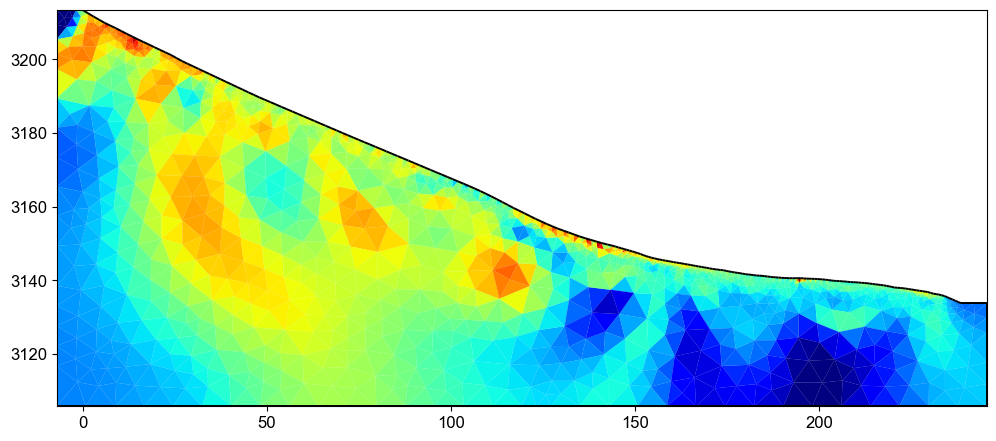

[report_generator] [INFO] Saved baseline resistivity plot
[report_generator] [INFO] Saved all timesteps resistivity plot
[report_generator] [INFO] Saved time-lapse resistivity percentage changes plot
[report_generator] [ERROR] Could not generate time-lapse absolute changes plot: 'list' object has no attribute 'shape'
[report_generator] [ERROR] Traceback: Traceback (most recent call last):
  File "C:\Users\HChen8\OneDrive - University of Iowa\Documents\GitHub\PyHydroGeophysX\PyHydroGeophysX\agents\report_agent.py", line 1569, in _generate_timelapse_visualizations
    if len(coverage.shape) == 2:
           ^^^^^^^^^^^^^^
AttributeError: 'list' object has no attribute 'shape'

  ❌ Time-lapse changes plot failed: 'list' object has no attribute 'shape'
[report_generator] [INFO] Saved climate data visualization plot
[report_generator] [INFO] Generating time-lapse narrative with LLM
[report_generator] [INFO] Time-lapse report saved to results\unified_workflow\example2\time_lapse_report.md
[r

<Figure size 640x480 with 0 Axes>

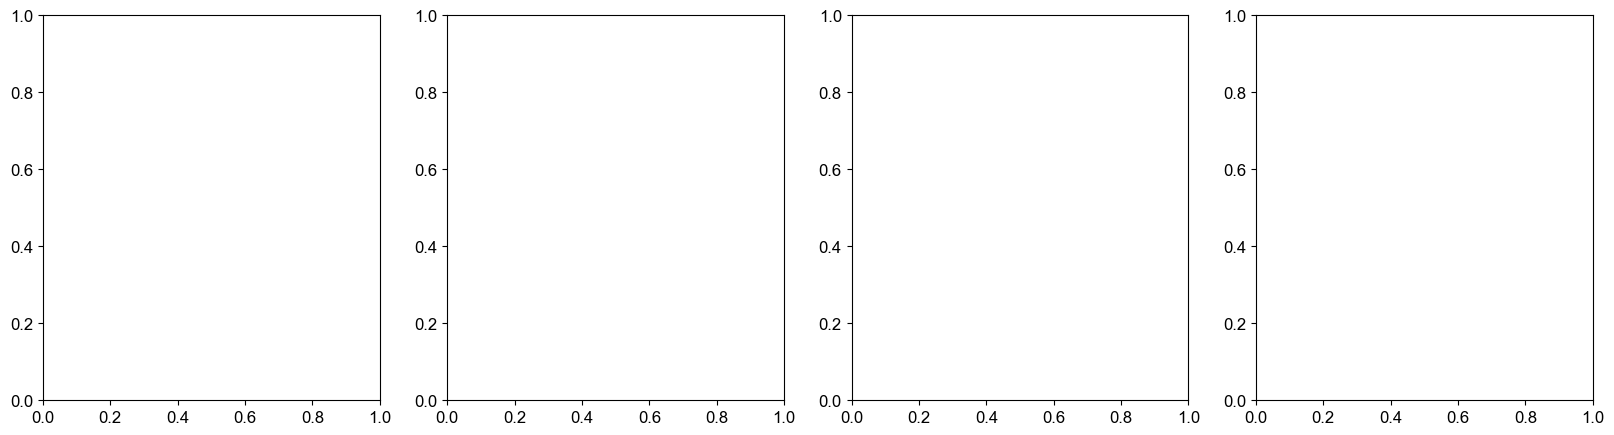

In [3]:
# Example: Time-Lapse ERT Workflow with Climate Integration
# The system detects TIME-LAPSE from multiple files and auto-fetches climate data!

# PART 1: ERT INVERSION REQUEST
# Focus on: data files, instrument, inversion settings, regularization
user_request_inversion = """
I need to run a TIME-LAPSE ERT inversion to monitor moisture infiltration.

DATA FILES FOR TIME-LAPSE INVERSION:
Please use these 4 E4D format data files located in folder data/ERT/E4D:

File 1 (BASELINE): 2022-03-26_0030.ohm
File 2: 2022-04-26_0030.ohm
File 3: 2022-05-26_0030.ohm
File 4: 2022-06-26_0030.ohm

INVERSION SETTINGS:
- Inversion Type: TIME-LAPSE (difference method)
- Instrument Type: E4D
- Data Directory: data/ERT/E4D
- Baseline File: First file (2022-03-26_0030.ohm)
- Temporal Regularization Parameter: 10
- Spatial Regularization (lambda): 15
- Maximum Iterations: 10
"""

# PART 2: CLIMATE/SITE REQUEST
# Focus on: coordinates, dates, climate variables, site information
user_request_climate = """
SITE INFORMATION:
- Site Name: Mt. Snodgrass Monitoring Site
- Location: Near Crested Butte, Colorado, USA
- Coordinates: Latitude 38.92584°N, Longitude -106.97998°W (WGS84)
- Elevation: 3,150 meters 
- Environment: High-elevation mountainous terrain with seasonal snow

CLIMATE DATA INTEGRATION:
Fetch meteorological data for correlation analysis with ERT monitoring:
- Site Coordinates: 38.92584°N, -106.97998°W
- Date Range: March 2022 to June 2022
- Climate Variables: precipitation (prcp), minimum temperature (tmin), 
  maximum temperature (tmax), solar radiation (srad), day length (dayl)
- Calculate Potential Evapotranspiration using Penman-Monteith method
- Temporal Resolution: Daily measurements
"""

# Combine both requests for the agent
user_request = user_request_inversion + "\n\n" + user_request_climate

print("="*70)
print("TWO-STAGE NATURAL LANGUAGE EXTRACTION")
print("="*70)
print("\n📝 Request Part 1: ERT Inversion Configuration")
print("   - Data files and instrument settings")
print("   - Inversion mode and parameters")
print("   - Regularization and solver options")
print("\n🌤️  Request Part 2: Climate/Site Configuration")
print("   - Site coordinates and location")
print("   - Date range for climate data")
print("   - Meteorological variables")
print("\n" + "="*70)
print("COMBINED USER REQUEST:")
print(user_request)
print("="*70)

# Parse natural language request
print("\n🤖 Parsing request...")
config = context_agent.parse_request(user_request)
print("✓ Configuration generated")

# Debug: Print config to see what was extracted
print(f"\n[DEBUG] Config keys: {list(config.keys())}")
print(f"\n[DEBUG] Full config:")
import json
print(json.dumps(config, indent=2, default=str))

# Check for time-lapse files
if 'timelapse_files' in config or 'time_lapse_files' in config:
    files = config.get('timelapse_files') or config.get('time_lapse_files', [])
    print(f"\n[DEBUG] Time-lapse files detected: {len(files)} files")
    for i, f in enumerate(files, 1):
        print(f"  {i}. {f}")
else:
    print("\n⚠️ WARNING: No time-lapse files detected!")

# Check for climate config
if 'climate_config' in config:
    print(f"\n[DEBUG] Climate integration enabled")
    coords = config['climate_config'].get('coords', 'N/A')
    dates = config['climate_config'].get('dates', 'N/A')
    print(f"  Coordinates: {coords}")
    print(f"  Date range: {dates}")
else:
    print("\n[INFO] No climate integration requested")

# Run unified workflow - automatically detects TIME-LAPSE and executes!
print("\n🚀 Running unified workflow (auto-detecting type)...")
output_dir = Path('results/unified_workflow/example2')
results, execution_plan, interpretation, report_files = BaseAgent.run_unified_agent_workflow(
    config, api_key, llm_model, llm_provider, output_dir
)

# Display results
print("\n" + "="*70)
print("WORKFLOW RESULTS")
print("="*70)
if interpretation:
    print(f"\n💡 Interpretation:\n{interpretation}")
    
if execution_plan:
    print(f"\n📋 Execution Plan ({len(execution_plan)} steps):")
    for i, step in enumerate(execution_plan, 1):
        print(f"  {i}. {step['step']} → {step['agent']}")

if results.get('status') == 'success':
    print("\n✅ Workflow completed successfully!")
    
    # Display time-lapse specific results
    if 'final_models' in results:
        n_timesteps = results['final_models'].shape[1]
        print(f"\n📊 Time-lapse results:")
        print(f"  - Number of time steps: {n_timesteps}")
        print(f"  - Baseline chi²: {results.get('chi2', 'N/A')}")
        
    if report_files:
        print(f"\n📄 Generated {len(report_files)} report files:")
        for name, path in report_files.items():
            print(f"  - {name}: {path}")
else:
    print(f"\n❌ Workflow failed: {results.get('error')}")

print("\n💡 TIP: The time-lapse workflow includes:")
print("  - Temporal resistivity changes (difference method)")
print("  - Climate data correlation (precipitation, temperature, PET)")
print("  - Time series plots showing resistivity vs. meteorological data")
print("="*70)


## 4. Debugging Tips

If you encounter issues with the time-lapse workflow:

### Common Issues

1. **"No time-lapse files detected"**
   - Check that multiple files are mentioned in the request
   - Ensure file paths are correct (relative to `data/ERT/E4D/`)

2. **"Climate data fetch failed"**
   - The system will create a conda environment `climate_fetch` automatically
   - This may take 2-3 minutes on first run
   - Check internet connection (downloads from DayMet API)

3. **"Could not extract dates from filenames"**
   - Dates must be in YYYY-MM-DD format (e.g., `2022-03-26`)
   - If using different format, update the regex pattern

4. **"Need at least 2 datasets for time-lapse"**
   - At least 2 ERT files are required for time-lapse
   - Check that files loaded successfully

### Output Files

After successful execution, you'll find:
- **`climate_config.json`** - Climate data configuration
- **`climate_data.csv`** - Fetched DayMet meteorological data  
- **`inversion/`** - Time-lapse inversion results
- **Reports** - HTML and Markdown reports with visualizations


## Summary

This notebook demonstrates the unified geophysical workflow interface:

- **Single Entry Point**: Just describe what you want in natural language
- **Auto-Detection**: WorkflowOrchestratorAgent determines the workflow type
- **Intelligent Routing**: Automatically uses the right agents for the task
- **Three Workflow Types**: Standard ERT, Time-Lapse, and Data Fusion

### For Data Fusion Workflows:

The `DataFusionAgent.execute_full_workflow()` method handles everything internally:
- Loads seismic and ERT data
- Runs seismic inversion (via SeismicAgent)
- Extracts velocity interface
- Runs structure-constrained ERT (via StructureConstraintAgent)
- Optionally converts to water content (via PetrophysicsAgent)

All operations are encapsulated - no need to manage individual agents!

### Next: Try the Streamlit Web App!

For an even easier interface, check out `app_geophysics_workflow.py` - a web UI where you can:
- Input natural language descriptions
- Upload data files
- Get results and reports automatically

Run with: `streamlit run app_geophysics_workflow.py`
